In [3]:
#!/usr/bin/env python3
import numpy as np 
import matplotlib.pylab as plt
import scipy.io.wavfile as wf
from scipy import signal
from scipy.fftpack import fft, fftfreq
import IPython.display as ipd
#%matplotlib


In [ ]:
# def signal_sampler(data, time, sample_freq):
#     # precisa da informação das sps que simulam o "tempo continuo"
    
#     # tempo para o amostrador time = np.linspace(0, data.size/sr, data.size)
    
#     # tempo de amostragem
#     ts = np.linspace(time[0], time[-1], int(sample_freq*(time[-1]-time[0])) + 1)
#     print('tempo amos vetor')
#     print(ts, ts.size)
#     # período de amostragem
#     print('sampf freq', sample_freq, 1/(sample_freq)*(ts[-1]-ts[0]))
#     Ts = 1/(sample_freq)*(ts[-1]-ts[0])
#     print('periodo amos')
#     print(Ts)
    
#     # saltos nas amostras:
#     indx = np.arange(time[0], time[-1]+Ts, Ts) * data.size
#     print('indices')
#     print(indx, indx.size)
    
#     samp_signal = np.zeros(sample_freq + 1) # +1 casando com o número de amostras de tempo
    
#     print('tamanho samp signa', samp_signal.size)
    
# #     for i in range(indx):
# #         for j in range(data.size):
# #             if j == int(indx[i]) - 1:

    
#     print('tamanho vetor amost')
#     print(samp_signal, samp_signal.size)
        
#     return ts, samp_signal

# test
# i, f = 0, 1
# tempo = np.linspace(i, f, 1600*(f-i)) # explica o +1 ""
# sinal=np.sin(2*np.pi*10*tempo)
# sample_freq = 11
# stime, samp = signal_sampler(sinal, tempo, sample_freq)
# plt.figure()
# plt.plot(time, sinal, 'r--')
# plt.stem(stime, samp)
# plt.show()

# print(stime.size, samp.size)

n/sps, n
2.88 127008
sr's
44100 44100
(127008, 2)


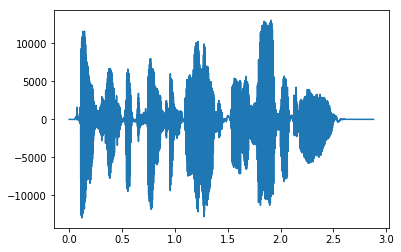

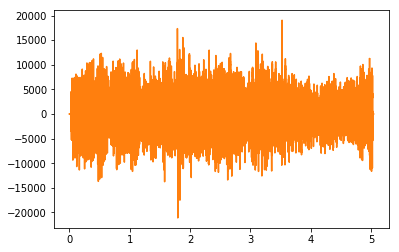

'\nWAV format\tMin\tMax\tNumPy dtype\n32-bit floating-point\t-1.0\t+1.0\tfloat32\n32-bit PCM\t-2147483648\t+2147483647\tint32\n16-bit PCM\t-32768\t+32767\tint16\n8-bit PCM\t0\t255\tuint8\nNote that 8-bit PCM is unsigned\n'

In [4]:
# Lê os arquivos de audio, resultando, para cada um, uma matriz (n, 2) onde n = número de amostras e 2 representa o numero de canais
sr1, audio_data1 = wf.read('googletradutor_44,1khz.wav') # retorna sr = taxa de amostragem
audio1_L = audio_data1[:, 0]
audio1_R = audio_data1[:, 1]
time1 = np.linspace( 0, audio1_L.size/sr1, audio1_L.size) # valores de tempo

print('n/sps, n')
print(audio1_L.size/sr1, audio1_L.size)

# audio 2
sr2, audio_data2 = wf.read('Lisa_Gerrard-Now_We_Are_Free_44.1khz.wav')
audio2_L = audio_data2[:, 0]
audio2_R = audio_data2[:, 1]
time2 = np.linspace( 0, audio2_L.size/sr2, audio2_L.size)

print('sr\'s')
print(sr1, sr2)
print(audio_data1.shape)
idx = 0
# print(min(audio_data1[:, idx]), max(audio_data1[:, idx]))

# print(audio_data1[:, 1].shape,)#min(audio_dat, max(audio_data1))

plt.figure()
plt.plot(np.linspace( 0, audio1_L.size/sr1, audio1_L.size), audio1_L) #3s
plt.show()
plt.figure()
plt.plot(np.linspace( 0, audio2_L.size/sr2, audio2_L.size), audio2_L, 'C1-') #s
plt.show()

# Como o audio apresenta valores altos... foi codificado com 16 bits??
'''
WAV format	Min	Max	NumPy dtype
32-bit floating-point	-1.0	+1.0	float32
32-bit PCM	-2147483648	+2147483647	int32
16-bit PCM	-32768	+32767	int16
8-bit PCM	0	255	uint8
Note that 8-bit PCM is unsigned
'''

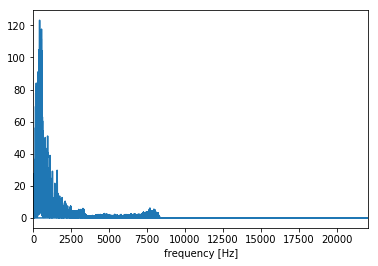

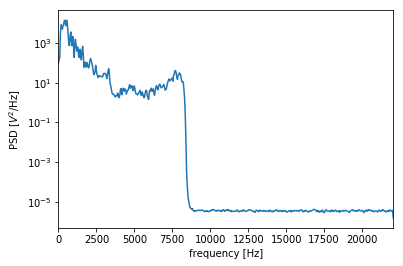

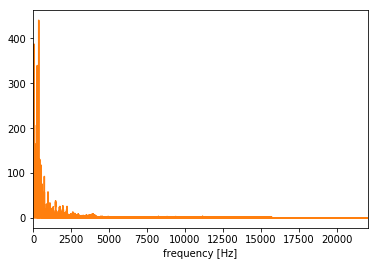

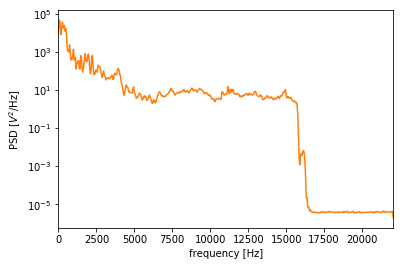

In [5]:
# AUDIO 1
#fft
plt.figure()
freq1 = fftfreq(audio1_L.size) * sr1
y1 = np.abs(fft(audio1_L))/audio1_L.size
plt.plot(freq1, y1)
plt.xlim(0, sr1/2)
plt.xlabel('frequency [Hz]')

# psd
f1, P_den1 = signal.welch(audio1_L, sr1, nperseg=1024)
plt.figure()
plt.semilogy(f1, P_den1)
plt.xlim(0, sr1/2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$V^2$/Hz]')

# AUDIO 2
#fft
freq2 = fftfreq(audio2_L.size) * sr2
y2 = np.abs(fft(audio2_L))/audio2_L.size
plt.figure()
plt.plot(freq2, y2, 'C1-')
plt.xlim(0, sr2/2)
plt.xlabel('frequency [Hz]')

# psd
f2, P_den2 = signal.welch(audio2_L, sr2, nperseg=1024)
plt.figure()
plt.semilogy(f2, P_den2, 'C1-')
plt.xlim(0, sr2/2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$V^2$/Hz]')

plt.show()

In [ ]:
ipd.Audio(data=audio1_L, rate=sr1)

In [ ]:
ipd.Audio(data=audio2_L, rate=sr2)

Taxa atual dos dados:
 500.0
Tamanho da sequência de dados:
 1500
Duração:
3.0s
Instantes de amostragem:
 [0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08
 1.12 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6  1.64
 1.68 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.   2.04 2.08 2.12 2.16 2.2
 2.24 2.28 2.32 2.36 2.4  2.44 2.48 2.52 2.56 2.6  2.64 2.68 2.72 2.76
 2.8  2.84 2.88 2.92 2.96 3.  ] 76
Amostras coletadas:
 [   0.   20.   40.   60.   80.  100.  120.  140.  160.  180.  200.  220.
  240.  260.  280.  300.  320.  340.  360.  380.  400.  420.  440.  460.
  480.  500.  520.  540.  560.  580.  600.  620.  640.  660.  680.  700.
  720.  740.  760.  780.  800.  820.  840.  860.  880.  900.  920.  940.
  960.  980. 1000. 1020. 1040. 1060. 1080. 1100. 1120. 1140. 1160. 1180.
 1200. 1220. 1240. 1260. 1280. 1300. 1320. 1340. 1360. 1380. 1400. 1420.
 1440. 1460. 1480. 1500.] 76


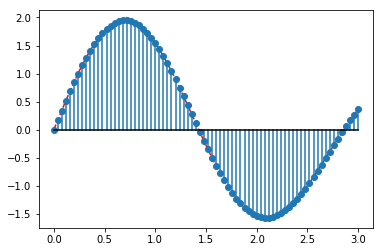

In [44]:
def signal_sampler(data, time, sample_freq):
    
    # taxa atual dos dados
    SR = time.size/(time[-1] - time[0])
    
    # Informações
    print('Taxa atual dos dados:\n',SR)
    print('Tamanho da sequência de dados:\n', time.size)
    print('Duração:\n{}s'.format(time[-1] - time[0]))
    
    # tempo de amostragem
    ts = np.linspace(time[0], time[-1], int(sample_freq*(time[-1] - time[0])) + 1)
    
    print('Instantes de amostragem:\n', ts, ts.size)
    
    # vetor p/ sinal amostrado
    sampled = np.zeros(ts.size)
    
    # Instantes de amostragem -> no domínio das amostas
    samp_indx = ts*SR
    
    print('Amostras coletadas:\n', samp_indx, samp_indx.size)
    
    # Processo de amostragem
    for i in range(ts.size):
        if i == 0:
            sampled[i] = data[i]
        else:
            sampled[i] = data[int(samp_indx[i]) - 1]
    
    return ts, sampled
    
# Teste:
# defino sinal
taxa = 500
i, f = 0, 3
tempo = np.linspace(i, f, taxa*(f - i))
freq_sinal = 1
sinal=np.sin(2*np.pi*0.4*freq_sinal*tempo) + np.sin(2*np.pi*0.3*freq_sinal*tempo)
# amostrar  na freq:
freq_amostr = 25

temp_amostr, amostrado = signal_sampler(sinal, tempo, freq_amostr)

# Visualização
plt.figure()
plt.plot(tempo, sinal, 'r--')
plt.stem(temp_amostr, amostrado, linefmt='-C0', markerfmt='C0o', basefmt='k-')
plt.show()

In [ ]:
# defino sinal
SR = 500
i, f = 0, 2
time = np.linspace(i, f, SR*(f - i))
sinal=np.sin(2*np.pi*1*time)

# amostrar  na freq:
sample_freq = 25 

# o tamanho do vetor tem uma a mais pois conta o instante 0

print(time.size, ('numero de amostras'))

ts, step = np.linspace(i, f, int(sample_freq*(time[-1]-time[0]) + 1), retstep=True)
print('tempo, tamanho do tempo e periodo de amostragem')
print(ts, ts.size, step)

sampled = np.zeros(ts.size)
print('tamanho alocado sinal amostrado')
print(sampled.size)

Ts = 1/(sampled.size - 1)*(time[-1]-time[0]) # garanto que recupero o mesmo Ts ...
print(' período de amostragem e o quanto a cada amostas ')
print(Ts, 1/Ts)

print('instantes de amostragem numero\n', ts*SR, ts.size)
s = ts*SR
print('tamanho sinal:', sinal.size)

print('teste')
for i in range(ts.size):
    if i == 0:
        print(i, int(s[i]), sinal[i])
        sampled[i] = sinal[i]
    else:
        print(i, int(s[i]-1), sinal[int(s[i])-1])
        sampled[i] = sinal[int(s[i])-1]
        
print(i + 1)
print(sampled)
# print(test, np.array(test).size)
# 500 termos do 0 ao 500-1
#for com indicex multiplos

In [ ]:
plt.stem(ts, sampled, linefmt='-C0', markerfmt='C0o', basefmt='k-')
plt.plot(time, sinal, 'r--')

# print(time)
# print(ts)

In [ ]:
sinal

In [ ]:
plt.plot(audio1_L[4800:5050]) # tirar psd ou fft ?
'''
pega o sinal sr, amostra taxa menor, reconstroi, aumenta até ver que minimizou...
ver o amostrado é mais robusto ao ruido ?

efeito do aliasing -> abaixo de 5k,  e até um valor que abaixae e receber pouco tipo 10... n sei
e reconstruir

sinal + ruido - amostra @ > 25- 38 e reconstroi
'''

In [ ]:
44100/2 

In [ ]:
print("Dados de entrada:\n\
")